### TASK 2
Load the two files into Pandas DataFrames. Make sure that the answers "None" are not interpreted as NaN by Pandas.

#### Explanation
We import pandas library which will be used to read data from files.

We use `read_csv` function to read files and we want to keep **None** values as strings so we pass `keep_default_na=False` as a parameter.

We use this function to read both files.

If there is any missing values we use `fillna` function to fill them in as a **None** string.

In [1]:
import pandas as pd

qf = pd.read_csv('questions.csv', keep_default_na=False)
rf = pd.read_csv('responses.csv', keep_default_na=False)

rf.fillna('None', inplace=True)
qf.fillna('None', inplace=True)

### TASK 3
Produce a bar plot of response frequencies to the second question "What is your level of programming experience?", for year 2024.

#### Explanation
1. We declare some constants for the question name and the year. 
2. We get all answers for specific question from responses and count them up.
3. We add missing answers if there was any.
4. Plot the graph.

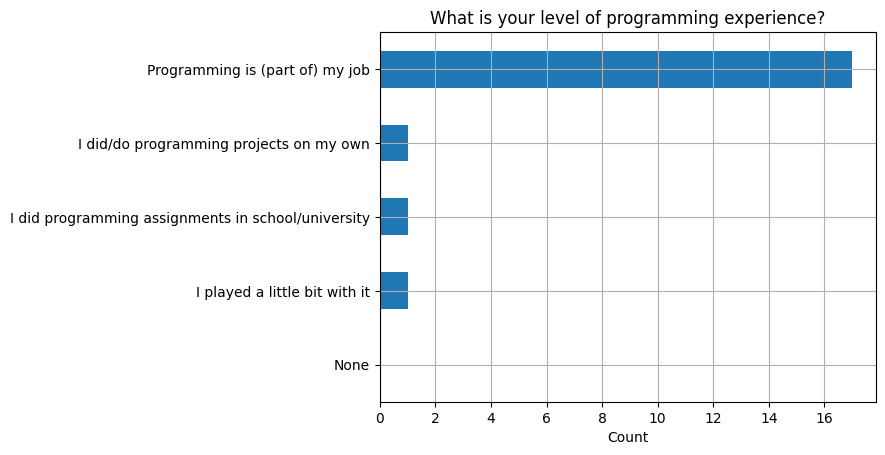

In [2]:
import matplotlib.pyplot as plt
QUESTION_NAME = 'What is your level of programming experience?'
QUESTION_YEAR = 2024

# Get all specific year question responses and count them up
rf_2024 = rf[rf['Year'] == QUESTION_YEAR][QUESTION_NAME].value_counts()

# Get all possible answers
questions = qf[qf['Question'] == QUESTION_NAME]['Answer']

# Make sure that all the answers are included in the results
for question in questions:
    if question not in rf_2024:
        rf_2024[question] = 0

# Plot horizontal bar chart
rf_2024.plot(kind='barh', color='#1F77B4', grid=True)

# Invert y axis to change order to decending
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Count')
plt.ylabel(None)
plt.title(QUESTION_NAME)

# Show plot
plt.show()

### TASK 4
Produce a similar bar plot for a different question, but with values for all the years 2020-2024 in a single plot, as bars of different colors for the different years, next to each other.

#### Explanation
To do this we first need to get all possible years and responses. Then we make a template with zeroes. We process real data to get the set and then we merge it with the template so that if real data was missing some responses it will be set to 0. After that we just need to draw the bar chart.

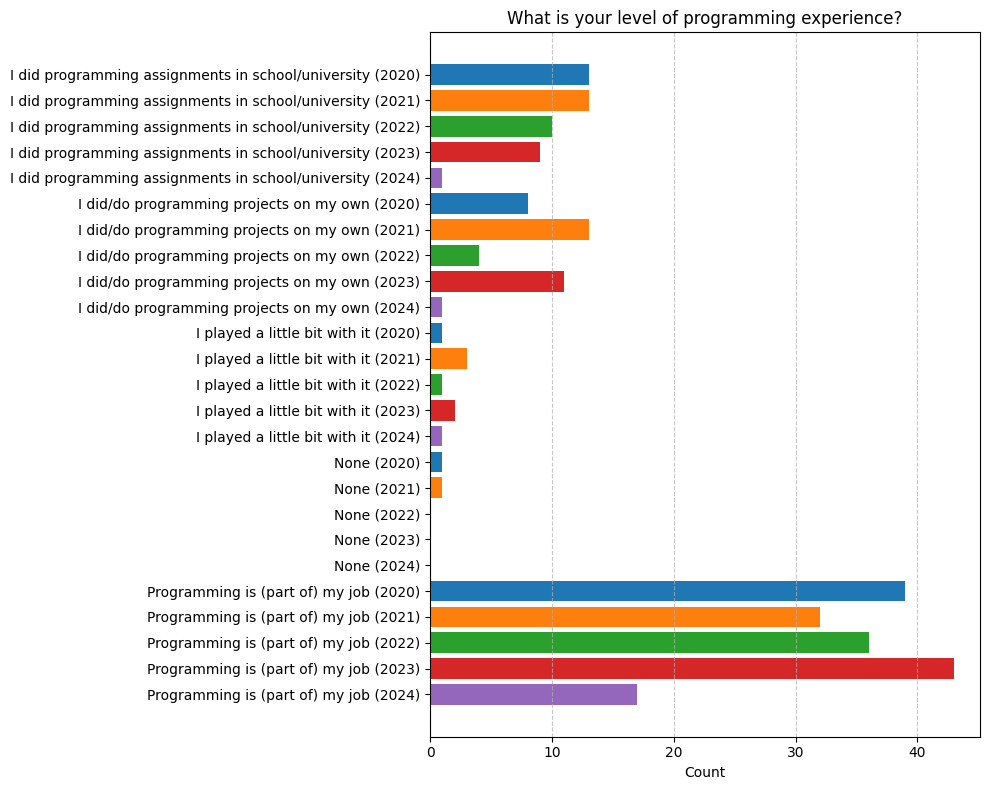

In [84]:
import matplotlib.pyplot as plt
# import itertools
QUESTION_NAME = 'What is your level of English?'
QUESTION_YEAR = "Year"

GROUP_BY = [QUESTION_NAME, 'Year']

# Get all possible answers
questions = qf[qf['Question'] == QUESTION_NAME]['Answer']
years = rf['Year'].unique()

# Creating all possible question year combinations and assigning value 0
template_data = pd.MultiIndex.from_product(
    [questions.values, years], names=[QUESTION_NAME, "Year"]
).to_frame(
    index=False
).groupby(
    GROUP_BY
).apply(
    lambda x: 0
, include_groups=False).rename("template")

# Group all responses by question name and year and get their counts for a specific question
groups = rf.groupby(GROUP_BY)[QUESTION_NAME].value_counts()

# Reset the index and prepare for merging
template_data = template_data.reset_index()

# Do an outer join merge so that if groups missing data gets filled with 0's
merged = pd.merge(
    template_data, 
    groups, 
    on=GROUP_BY,
    how='left'
)

# After merge some values are NaN so we fill it in with 0
merged['count'] = merged['count'].fillna(0)

# Drop the template column which has only zeros
merged = merged.drop(columns='template')

# Plot horizontal bar chart
merged['question_year'] = merged[QUESTION_NAME] + " (" + merged['Year'].astype(str) + ")"

# Using color map to set each year bar color
cmap = plt.get_cmap('tab10')
colors = {year: cmap(i) for i, year in enumerate(years)}
bar_colors = merged['Year'].map(colors)

plt.figure(figsize=(10, 8))  # Set figure size
plt.barh(merged['question_year'], merged['count'], color=bar_colors)

# # Invert y axis to change order to decending
plt.gca().invert_yaxis()

# # Add labels and title
plt.xlabel('Count')
plt.ylabel(None)
plt.title(QUESTION_NAME)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# # Show plot
plt.tight_layout()
plt.show()

### TASK 5


####